<a href="https://colab.research.google.com/github/MahmudGalib7/AI-Olympiad/blob/master/machine_learning/notebook/In_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload = files.upload()

Saving Dhaka_PM2.5_2016.csv to Dhaka_PM2.5_2016.csv
Saving Dhaka_PM2.5_2017.csv to Dhaka_PM2.5_2017.csv
Saving Dhaka_PM2.5_2018.csv to Dhaka_PM2.5_2018.csv
Saving Dhaka_PM2.5_2019.csv to Dhaka_PM2.5_2019.csv
Saving Dhaka_PM2.5_2020.csv to Dhaka_PM2.5_2020.csv
Saving Dhaka_PM2.5_2021.csv to Dhaka_PM2.5_2021.csv
Saving Dhaka_PM2.5_2022.csv to Dhaka_PM2.5_2022.csv


In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
sample_data = {
    "hours" : [2, 3, 4, 5, 6, 8, 10, 12, 16],
    "exam_score" : [40, 50, 55, 60, 70, 80, 85, 90, 95]
}

In [ ]:
df = pd.DataFrame(sample_data)
x = df[['hours']]
y = df['exam_score']

In [ ]:
model = LinearRegression()
model.fit(x, y)
prediction = model.predict([[18]])
prediction[0]
model.coef_[0]
model.intercept_

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(40.25490196078431)

In [3]:
filelist = glob.glob('/content/*.csv')
filelist

['/content/Dhaka_PM2.5_2016.csv',
 '/content/Dhaka_PM2.5_2022.csv',
 '/content/Dhaka_PM2.5_2021.csv',
 '/content/Dhaka_PM2.5_2019.csv',
 '/content/Dhaka_PM2.5_2020.csv',
 '/content/Dhaka_PM2.5_2017.csv',
 '/content/Dhaka_PM2.5_2018.csv']

In [4]:
# read and combine
combined_files = []
for file in filelist:
  print(file)
  df = pd.read_csv(file)
  df['source_file'] = file.split('/')[-1]
  combined_files.append(df)

/content/Dhaka_PM2.5_2016.csv
/content/Dhaka_PM2.5_2022.csv
/content/Dhaka_PM2.5_2021.csv
/content/Dhaka_PM2.5_2019.csv
/content/Dhaka_PM2.5_2020.csv
/content/Dhaka_PM2.5_2017.csv
/content/Dhaka_PM2.5_2018.csv


In [5]:
data = pd.concat(combined_files, ignore_index=True) # creating Dataframe from Dataset

In [6]:
data.info() # Data structure
data.isna().sum() # Getting sum of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53355 entries, 0 to 53354
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date (LT)      53355 non-null  object 
 1   Hour           53355 non-null  int64  
 2   NowCast Conc.  53355 non-null  float64
 3   Raw Conc.      53355 non-null  int64  
 4   Conc. Unit     53355 non-null  object 
 5   AQI            53355 non-null  int64  
 6   AQI Category   51497 non-null  object 
 7   QC Name        53355 non-null  object 
 8   source_file    53355 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ MB


,0
Date (LT),0
Hour,0
NowCast Conc.,0
Raw Conc.,0
Conc. Unit,0
AQI,0
AQI Category,1858
QC Name,0
source_file,0


In [7]:
data.rename(columns={
    "Date (LT)":"date_lt",
    "NowCast Conc.":"NowCast_Conc",
    "Raw Conc.":"raw_conc",
    "Conc. Unit": "conc_unit",
    "AQI Category": "AQI_category",
    "QC Name": "QC_name"
}, inplace=True) # renaming columns

In [8]:
data.head()

# data['raw_conc'] = data['raw_conc'].astype('int64') # Converting data type
data['raw_conc'] = pd.to_numeric(data['raw_conc'], errors="coerce")
data['NowCast_Conc'] = pd.to_numeric(data['NowCast_Conc'], errors="coerce")
data['AQI'] = pd.to_numeric(data['AQI'], errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53355 entries, 0 to 53354
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_lt       53355 non-null  object 
 1   Hour          53355 non-null  int64  
 2   NowCast_Conc  53355 non-null  float64
 3   raw_conc      53355 non-null  int64  
 4   conc_unit     53355 non-null  object 
 5   AQI           53355 non-null  int64  
 6   AQI_category  51497 non-null  object 
 7   QC_name       53355 non-null  object 
 8   source_file   53355 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ MB


In [9]:
data = data.dropna()
data.describe()
data.isnull()

,date_lt,Hour,NowCast_Conc,raw_conc,conc_unit,AQI,AQI_category,QC_name,source_file
1442,False,False,False,False,False,False,False,False,False
1443,False,False,False,False,False,False,False,False,False
1444,False,False,False,False,False,False,False,False,False
1445,False,False,False,False,False,False,False,False,False
1446,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
53350,False,False,False,False,False,False,False,False,False
53351,False,False,False,False,False,False,False,False,False
53352,False,False,False,False,False,False,False,False,False
53353,False,False,False,False,False,False,False,False,False


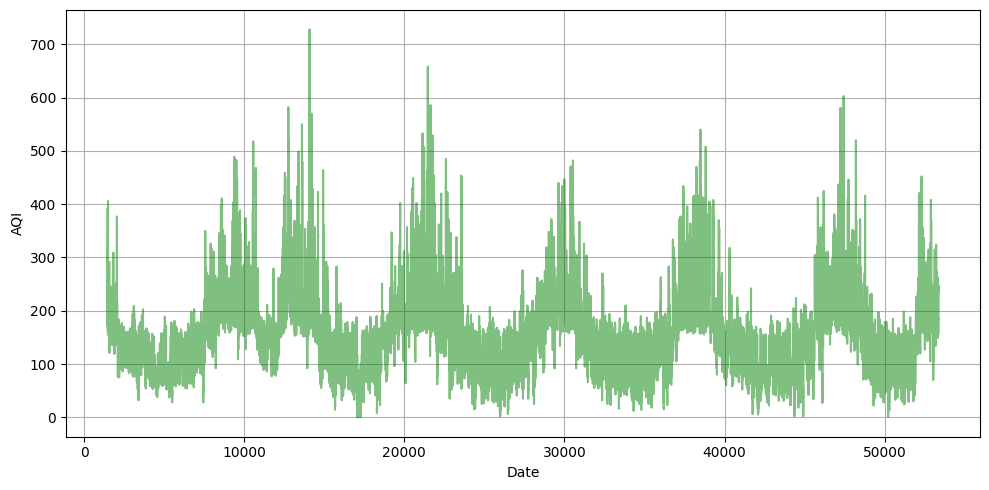

In [10]:
plt.figure(figsize=(10,5))
plt.plot(data.index, data['AQI'], color="green", alpha=0.5)
plt.grid()
plt.xlabel("Date")
plt.ylabel("AQI")
plt.tight_layout()

HW -> Draw a graph based on the AQI's avg over the years

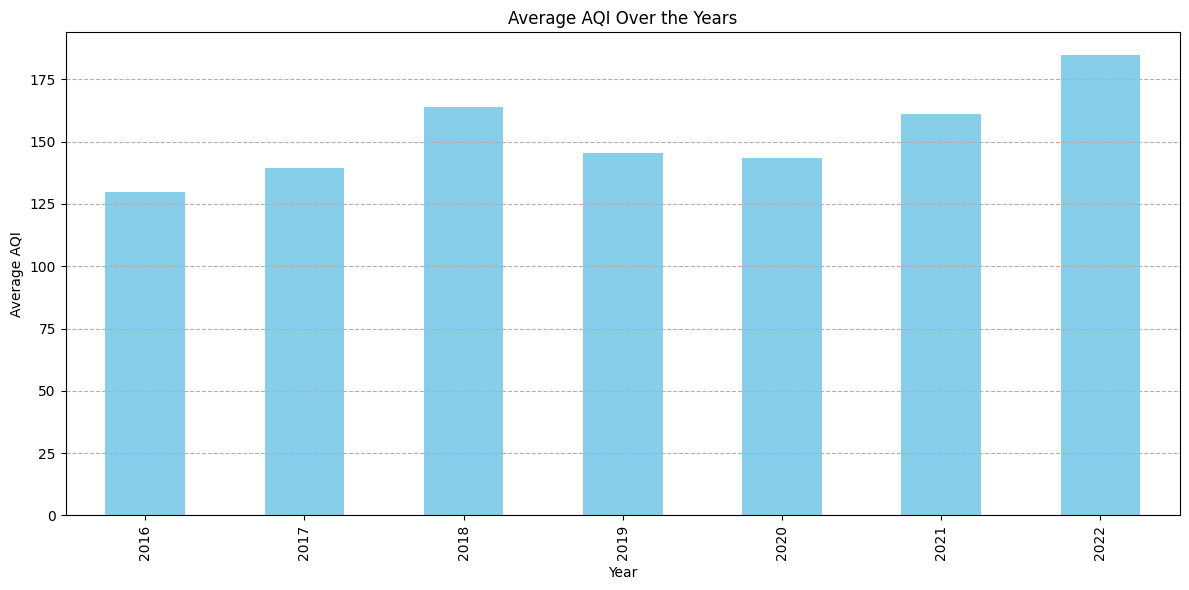

In [13]:
data['date_lt'] = pd.to_datetime(data['date_lt'], errors='coerce')

data['year'] = data['date_lt'].dt.year

data.dropna(subset=['year', 'AQI'], inplace=True)
data['year'] = data['year'].astype(int)
yearly_avg_aqi = data.groupby('year')['AQI'].mean()

plt.figure(figsize=(12, 6))
yearly_avg_aqi.plot(kind='bar', color='skyblue')
plt.title('Average AQI Over the Years')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()